# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [12]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io
from skimage import img_as_float

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal
#from scipy.signal import butter, lfilter


Pretty printing has been turned ON


## Filtering 
**1.1**

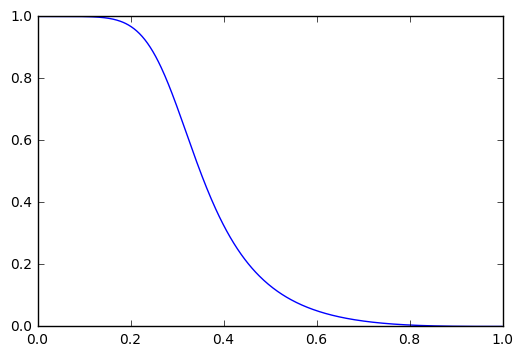

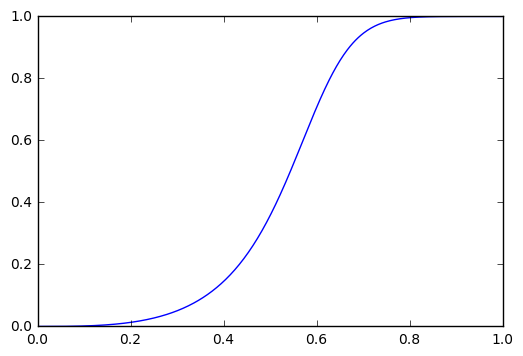

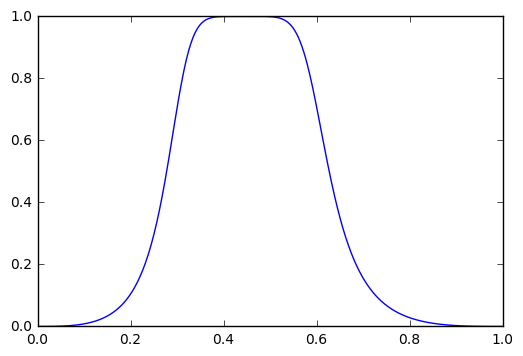

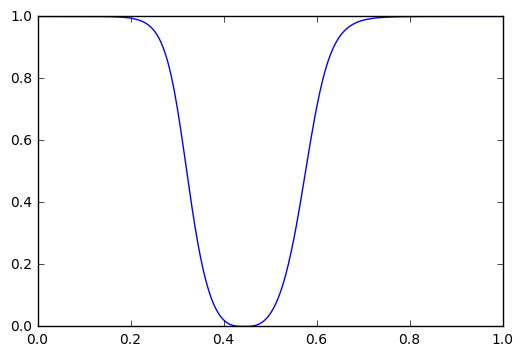

In [2]:
#def butter_bandpass(lowcut,highcut,fs,order=3)
#nyq=*fs
#low=lowcut.nya
b1,a1=signal.butter(3,0.3,'low')
w1,h1=signal.freqz(b1,a1)
b2,a2=signal.butter(3,0.6,'high')
w2,h2=signal.freqz(b2,a2)
b3,a3=signal.butter(3,[0.3,0.6],'bandpass')
w3,h3=signal.freqz(b3,a3)
b4,a4=signal.butter(3,[0.3,0.6],'bandstop')
w4,h4=signal.freqz(b4,a4)
plt.figure()
plt.plot(w1/np.pi,np.abs(h1))
plt.figure()
plt.plot(w2/np.pi,np.abs(h2))
plt.figure()
plt.plot(w3/np.pi,np.abs(h3))
plt.figure()
plt.plot(w4/np.pi,np.abs(h4))


**1.2**

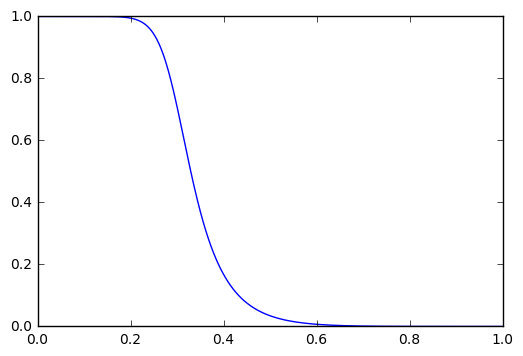

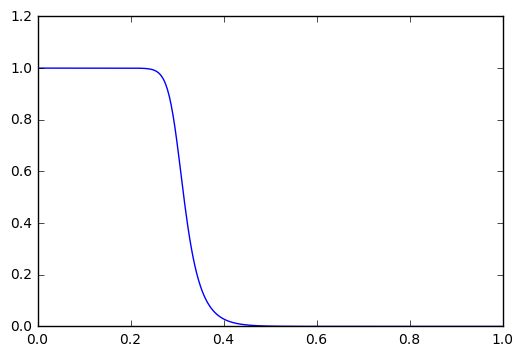

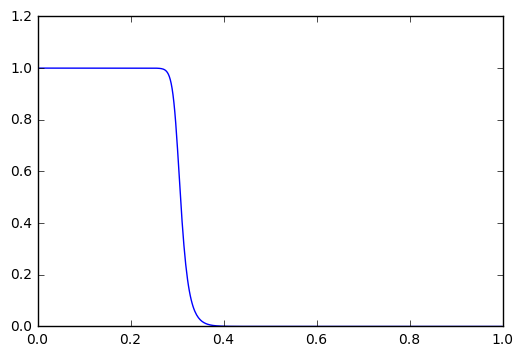

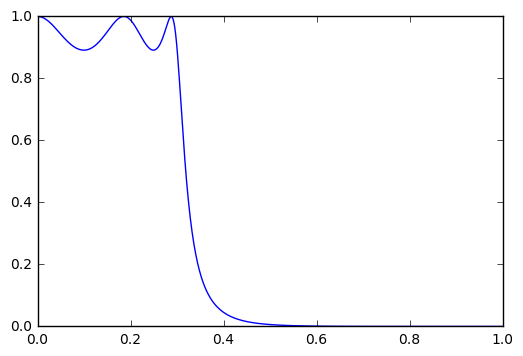

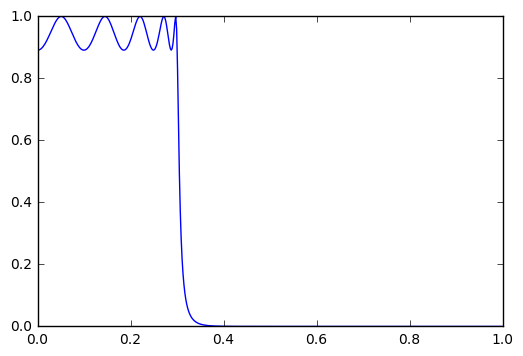

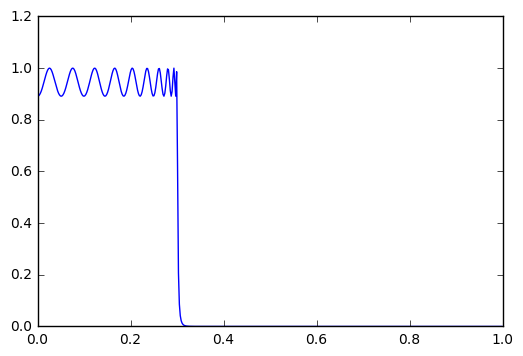

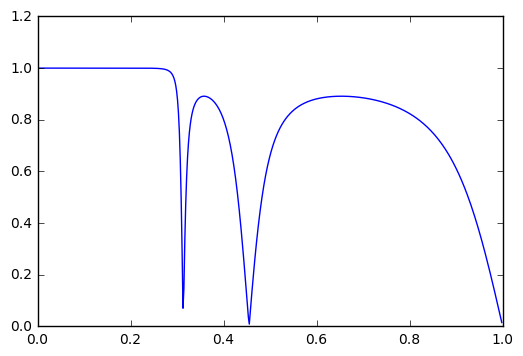

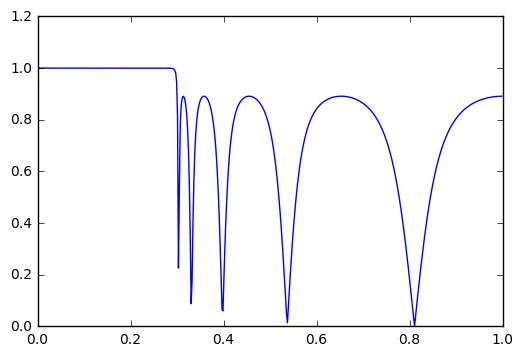

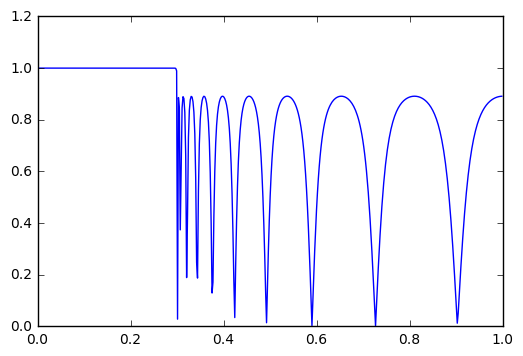

In [3]:
#low=lowcut.nya
b5,a5=signal.butter(5,0.3,'low')
w5,h5=signal.freqz(b5,a5)
plt.figure()
plt.plot(w5/np.pi,np.abs(h5))

#low=lowcut.nya
b10,a10=signal.butter(10,0.3,'low')
w10,h10=signal.freqz(b10,a10)
plt.figure()
plt.plot(w10/np.pi,np.abs(h10))

#low=lowcut.nya
b20,a20=signal.butter(20,0.3,'low')
w20,h20=signal.freqz(b20,a20)
plt.figure()
plt.plot(w20/np.pi,np.abs(h20))

#low=lowcut.nya
b5c,a5c=signal.cheby1(5,1,0.3,'low')
w5c,h5c=signal.freqz(b5c,a5c)
plt.figure()
plt.plot(w5c/np.pi,np.abs(h5c))

#low=lowcut.nya
b10c,a10c=signal.cheby1(10,1,0.3,'low')
w10c,h10c=signal.freqz(b10c,a10c)
plt.figure()
plt.plot(w10c/np.pi,np.abs(h10c))

#low=lowcut.nya
b20c,a20c=signal.cheby1(20,1,0.3,'low')
w20c,h20c=signal.freqz(b20c,a20c)
plt.figure()
plt.plot(w20c/np.pi,np.abs(h20c))

#low=lowcut.nya
b5c2,a5c2=signal.cheby2(5,1,0.3,'low')
w5c2,h5c2=signal.freqz(b5c2,a5c2)
plt.figure()
plt.plot(w5c2/np.pi,np.abs(h5c2))

#low=lowcut.nya
b10c2,a10c2=signal.cheby2(10,1,0.3,'low')
w10c2,h10c2=signal.freqz(b10c2,a10c2)
plt.figure()
plt.plot(w10c2/np.pi,np.abs(h10c2))
#low=lowcut.nya
b20c2,a20c2=signal.cheby2(20,1,0.3,'low')
w20c2,h20c2=signal.freqz(b20c2,a20c2)
plt.figure()
plt.plot(w20c2/np.pi,np.abs(h20c2))


## Recursive filter 

**2.1**

<Container object of 3 artists>

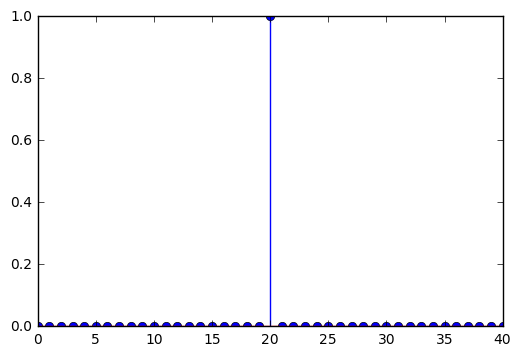

In [4]:
def dirac (n=0, N=41):
    s=np.zeros((N,))
    s[n]=1
    return s
signal1=dirac(20)
plt.figure
plt.stem(signal1)



**2.2**

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14
 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


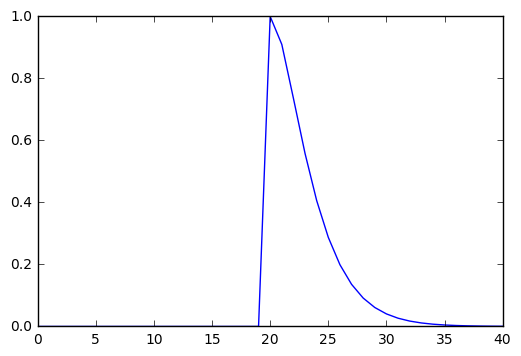

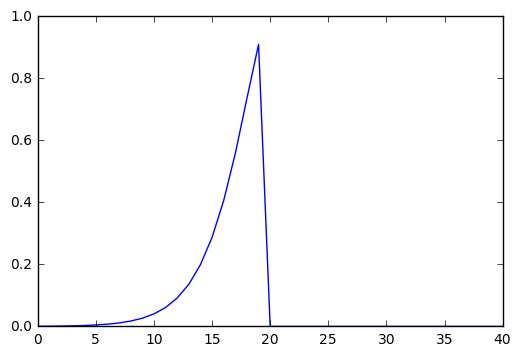

In [5]:
def smoothP(x,s):
    N=len(x)
    T=1
    l=s*T
    a=np.exp(-l)
    yp=np.zeros((N,))
    yp[0:1]=0
    A=np.arange(2,N,1)
    print(A)
    for k in A:
        yp[k]=a*(l-1)*x[k-1]+x[k]+2*a*yp[k-1]-a*a*yp[k-2]
    return yp

def smoothN(x,s):
    N=len(x)
    T=1
    l=s*T
    a=np.exp(-l)
    yn=np.zeros((N,))
    yn[N-2:N]=0
    K=np.arange(N-3,-1,-1)
    print(K)

    for k in K:
        yn[k]=a*(l+1)*x[k+1]-a*a*x[k+2]+2*a*yn[k+1]-a*a*yn[k+2]
    return yn
ypp=smoothP(signal1,0.5)
ynn=smoothN(signal1,0.5)
plt.figure()
plt.plot(ypp)
plt.figure()
plt.plot(ynn)


**2.3**

<Container object of 3 artists>

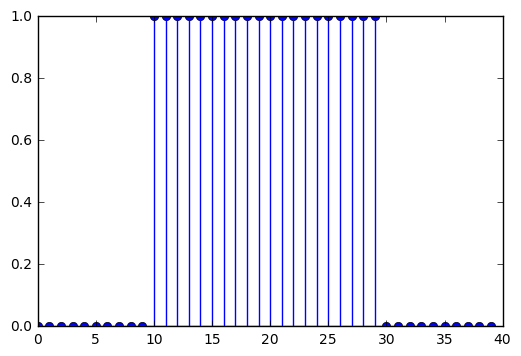

In [6]:
def step(n=0, N=40):
    s=np.zeros((N,))
    for idx_s in np.arange(n,N):
        s[idx_s]=1
    return s 
signal2=step(10)-step(30)
plt.figure
plt.stem(signal2)    


**2.4**

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14
 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


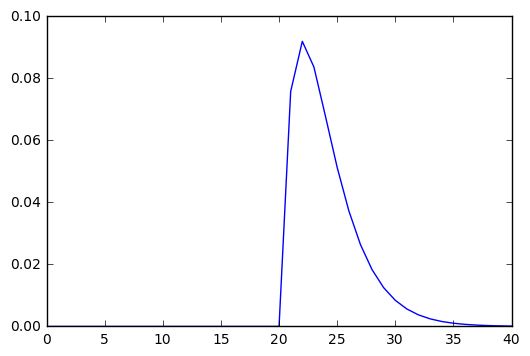

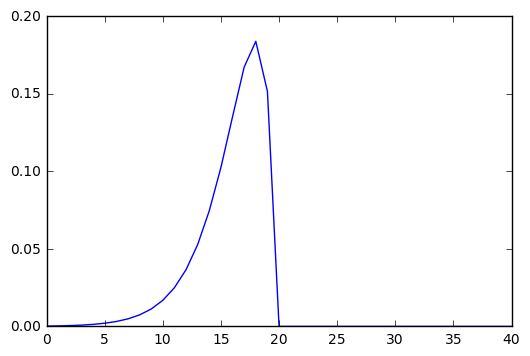

In [7]:

def derivativeP(x,s):
    N=len(x)
    T=1
    l=s*T
    a=np.exp(-l)
    ydp=np.zeros((N,))
    ydp[0:1]=0
    Ad=np.arange(2,N,1)
    print(Ad)
    for k in Ad:
        ydp[k]=-s*l*a*(l-1)*x[k-1]+2*a*ydp[k-1]-a*a*ydp[k-2]
    return ydp

def derivativeN(x,s):
    N=len(x)
    T=1
    l=s*T
    a=np.exp(-l)
    ydn=np.zeros((N,))
    ydn[N-2:N]=0
    Kd=np.arange(N-3,-1,-1)
    print(Kd)

    for k in Kd:
        ydn[k]=s*l*a*x[k+1]+2*a*ydn[k+1]-a*a*ydn[k+2]
    return ydn
ydpp=derivativeP(signal1,0.5)
ydnn=derivativeN(signal1,0.5)
plt.figure()
plt.plot(ydpp)
plt.figure()
plt.plot(ydnn)


**3.1**

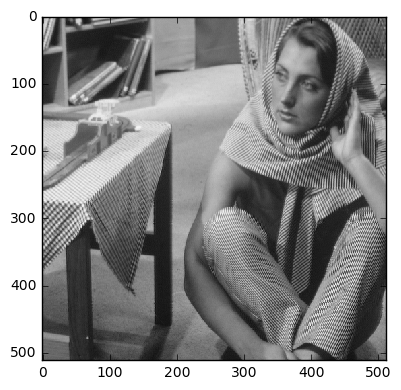

In [18]:
img=io.imread(('../images/barbara.gif'),as_gray=True)
io.imshow(img)


**3.2** , **3.3**

In [22]:
height, width = img.shape[:2]
#for i in range(height):
    smoothP(height,0.5)

IndentationError: unexpected indent (<ipython-input-22-788caf02f0d1>, line 3)

**3.4**